# Natural Language processing 

The text should be completely clean before pass it to the deep learning model, to do the cleaning process, tere are set of steps to ensure that the test is cleaned.
<div>
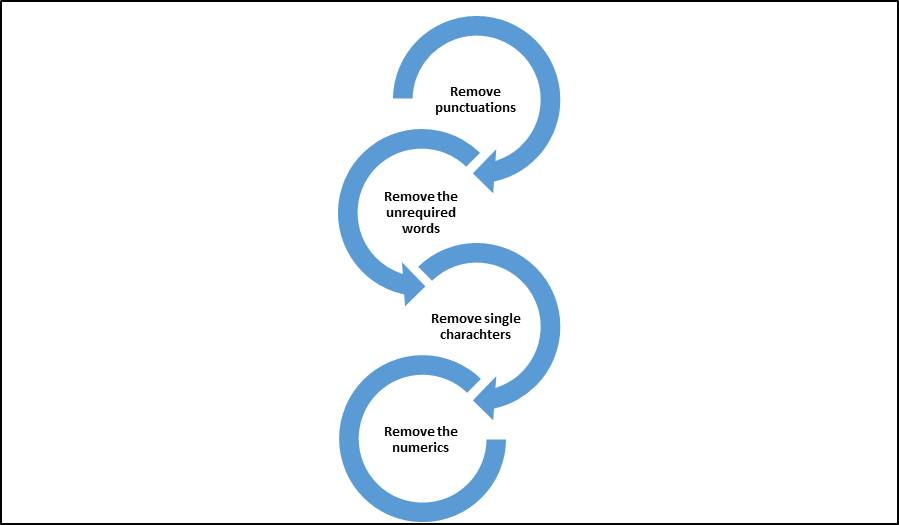
</div>

### Load the required libraries:

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import pyarabic.araby as ar                                     
import string                         
import re                        
from nltk.corpus import stopwords            
from nltk.stem.porter import PorterStemmer   
from nltk.stem import SnowballStemmer
from pyarabic.araby import strip_harakat
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import strip_diacritics
from pyarabic.araby import strip_tatweel, strip_shadda
from pyarabic.araby import normalize_ligature
import pyarabic.number
from string import punctuation

### Load the required document:

The caption file named as 'arabic_captions_path='C:\\Users\\hp\\Desktop\\Personal files\\HTU\\python\\project\\Dataset\\Flickr8k_text\\Flickr8k.arabic.full.txt'' contains 24000 captions , and image ID associated with each caption, accordingly, the fisrst step is to split the captions in seperate file.

In [9]:
def load_document(filename):
    file=open(filename,'r',encoding='utf-8')
    text=file.read()
    file.close()
    return text

In [10]:
#Create data frame that shows all captions:
datatxt = []
for line in text.split('\n'):
   col = line.split('\t')#Split the captions to array of image ID and captions
   if len(col) == 1:#To skip short captions "في.المنطقة.المشجرة"
       continue
   w = col[0].split("#")#To remove the extension from the image id
   datatxt.append(w + [col[1].lower()])

data = pd.DataFrame(datatxt,columns=["file","index","caption"])
data = data.reindex(columns =['index','file','caption'])
data = data[data.file != '2258277193_586949ec62.jpg']
uni_filenames = np.unique(data.file.values)

data.head()

,index,file,caption
0,0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها
2,2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية
3,0,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...
4,1,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...


### Text cleaning and preparation:

Prepare the text for by clean it from the unrequired elements as mentioned above:
1. Remove the punctuations.
2. Remove any single character.
3. Remove the numeric values by replacing them with Arabic number words.
4. Remove the defining words which is called (ال التعريف).
5. Remove the Harakat from the text.

In [3]:
nltk.download('punkt') # Download the english punctuation
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation     # Get all the special characters.   
punctuations_list = arabic_punctuations + english_punctuations 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def remove_punctuations(data):
    return ''.join([c for c in data if c not in punctuations_list])
#def remove_punctuation(text):
    #text_no_punctuation = re.sub(r'[^\w\s]', '', text)
    #return text_no_punctuation

def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

def remove_numeric(text):
    # Use regular expression to extract all Arabic numerals from the text
    numerals = re.findall(r'\d+', text)
    # Convert each numeral to its corresponding word form
    an = pyarabic.number.ArNumbers()
    text_no_numeric = text
    for numeral in numerals:
        word_form = an.int2str((numeral))
        text_no_numeric = text_no_numeric.replace(numeral, word_form)
    return text_no_numeric
 
def remove_defining_words(text):
    text_with_no_defining_chr=re.sub(r'\bال(\w\w+)', r'\1', text)
    return text_with_no_defining_chr


def remove_harakat(text):
    text_no_harakat=strip_tashkeel(text)
    text_no_diacritics=strip_diacritics(text_no_harakat)
    text_no_tatweel=strip_tatweel(text_no_diacritics)
    text_wihout_english=re.sub(r'[a-zA-Z]+', '',text_no_tatweel)
    return (text_wihout_english)

def clean_text(data):
    text = remove_punctuations(data)
    text = remove_numeric(text)
    text = remove_single_character(text)
    text=remove_defining_words(text)
    text=remove_harakat(text)
    return(text)


for i, caption in enumerate(data.caption.values):
   cleaned_text = clean_text(caption)
   data["caption"].iloc[i] = cleaned_text

In [12]:
data

,index,file,caption
0,0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق درج إلى منزلها
2,2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى مقصورة خشبية
3,0,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي ألوان يلعبان مع بعضهما بع...
4,1,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما...
...,...,...,...
24268,1,997338199_7343367d7f.jpg,امرأة تقف بالقرب من جدار مزخرف تكتب
24269,2,997338199_7343367d7f.jpg,جدران مغطاة بالذهب والأنماط
24270,0,997722733_0cb5439472.jpg,رجل يرتدي قميصا ورديا يتسلق وجها صخريا
24271,1,997722733_0cb5439472.jpg,رجل يتسلق صخور في هواء


In [13]:
###### An example of how the captions will looks like:
text='ذَهبتُ إلى الحديقةِ وشاهدت 4 فتيات يطعمنَ البط، ويساعدن المحتاجين!'
clean_text(text)

' ذهبت إلى حديقة وشاهدت أربع فتيات يطعمن بط ويساعدن محتاجين'

### Save the cleaned text file

In [ ]:
# Update the function to take the cleaned captions and the desired file name and location
def save_descriptions(descriptions, filename):
    with open(filename, 'w',encoding='utf-8') as file:
        for desc in descriptions:
            file.write(desc + '\n')

# Define the desired file name and location on the desktop
#cleaned_captions = 'C:\\Users\\hp\\Desktop\\Personal files\\HTU\\python\\project\\workingfile\\captions\\clean_text.txt'

# Collect the cleaned captions in a list
cleaned_captions = []
for i, caption in enumerate(data.caption.values):
   cleaned_text = clean_text(caption)
   cleaned_captions.append(cleaned_text)
   data["caption"].iloc[i] = cleaned_text
# Save the cleaned captions to the desired file
save_descriptions(cleaned_captions, cleaned_captions) 